This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformed import PhysicsInformedBarModel # py file which contains custom class for training
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

In [2]:
SAVE_DIR = os.path.join("..", "images")
print(SAVE_DIR)

../images


Custom function needed to generate training and testing data

In [3]:
def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    return x

In [4]:
L = 1
x_c = generate_grid_1d(L, samples=100)

2. Analytical solution for validation

In [5]:
u_analytic = lambda x: np.sin(2 * np.pi * x / L)

3. Problem data are defined. Here the known data like mechanical parameters, boundary condition and loading conditions are defined

In [6]:
E = 1
A = 1
#Initial condition
u0 = torch.tensor([0., 0.], requires_grad=True, dtype=torch.float32)
x0 = torch.tensor([0., 1.], requires_grad=True, dtype=torch.float32)
distLoad = lambda x: 4*torch.pi**2 * torch.sin(2*torch.pi * x)

In [7]:
inputs = torch.cat([x0, x_c], 0) #Concatenate tensors along a given dimension
inputs = inputs.unsqueeze(1) #Add another dimension to the tensor
inputs.shape

torch.Size([102, 1])

4. Next we generate the neural network model using the imported class PhysicsInformedBarModel

In [8]:
pinn_model = PhysicsInformedBarModel(inputs, E, A, L, u0, dist_load=distLoad) # use the designed custom class from physicsinformed.py file

5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [9]:
epochs = 10
lr = 1e-2

losses = pinn_model.train(epochs, optimizer='LBFGS', lr=lr) # function defined in custom class for training

Epoch    1/10
MSEu: 0.0032 | MSEc: 770.9749 | Total: 770.9780
Epoch    2/10
MSEu: 11.4975 | MSEc: 45.1274 | Total: 56.6250
Epoch    3/10
MSEu: 13.5512 | MSEc: 17.5951 | Total: 31.1463
Epoch    4/10
MSEu: 4.4894 | MSEc: 5.6717 | Total: 10.1611
Epoch    5/10
MSEu: 0.1306 | MSEc: 1.2587 | Total: 1.3893
Epoch    6/10
MSEu: 0.0114 | MSEc: 0.3276 | Total: 0.3389
Epoch    7/10
MSEu: 0.0058 | MSEc: 0.0803 | Total: 0.0862
Epoch    8/10
MSEu: 0.0007 | MSEc: 0.0331 | Total: 0.0338
Epoch    9/10
MSEu: 0.0001 | MSEc: 0.0138 | Total: 0.0139
Epoch   10/10
MSEu: 0.0000 | MSEc: 0.0068 | Total: 0.0068


6. We generate sample test data using utilities library and then predict the displacements at those test points

In [10]:
samples = 100
x_test = generate_grid_1d(L, samples)
x_test = x_test.unsqueeze(1)
u_test = pinn_model.predict(x_test) # function defined in the custom class to get model predicted values

7. We plot predicted displacements at test points and also the training history

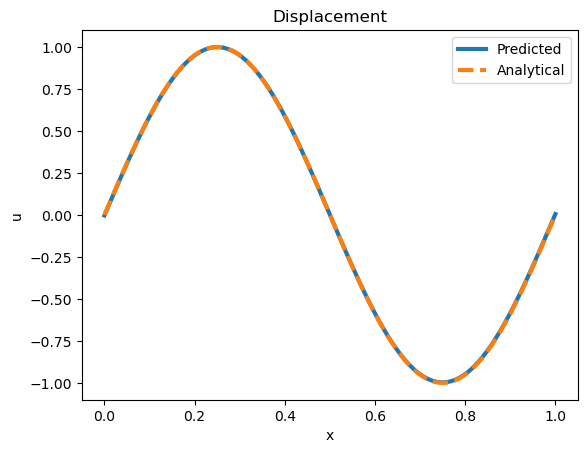

In [11]:
# plot the results and training losses. Refer the pptx file results slide for more information
displacement = u_test.detach().numpy()
x_numpy = x_test.detach().numpy()
plt.plot(x_numpy, displacement, label='Predicted', lw=3)
plt.plot(x_numpy, u_analytic(x_numpy), label='Analytical', linestyle="--", lw=3)
plt.legend()
plt.title('Displacement')
plt.xlabel('x')
plt.ylabel('u')
plt.savefig(os.path.join(SAVE_DIR, "0101.png"))
plt.show()

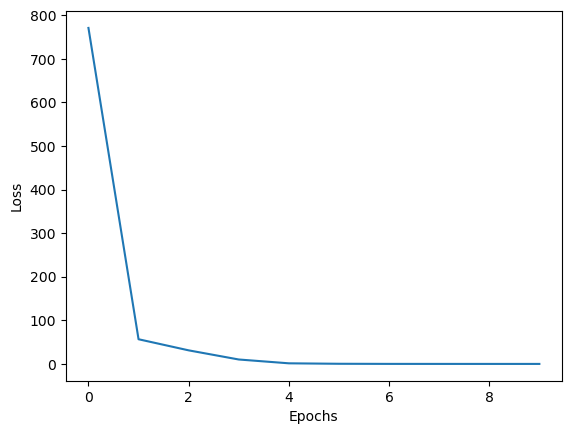

In [12]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig(os.path.join(SAVE_DIR, "0102.png"))
plt.show()